In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [16]:
# Load the dataset
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [17]:
df.describe(include = "all")

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
unique,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,NaN,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,NaN,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,NaN,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,NaN,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,NaN,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000


In [18]:
# From the results above, we see that there was the same number of records indicates that the was no empty records
# Drop non-numeric column (country)
df_numeric = df.drop(columns=['country'])

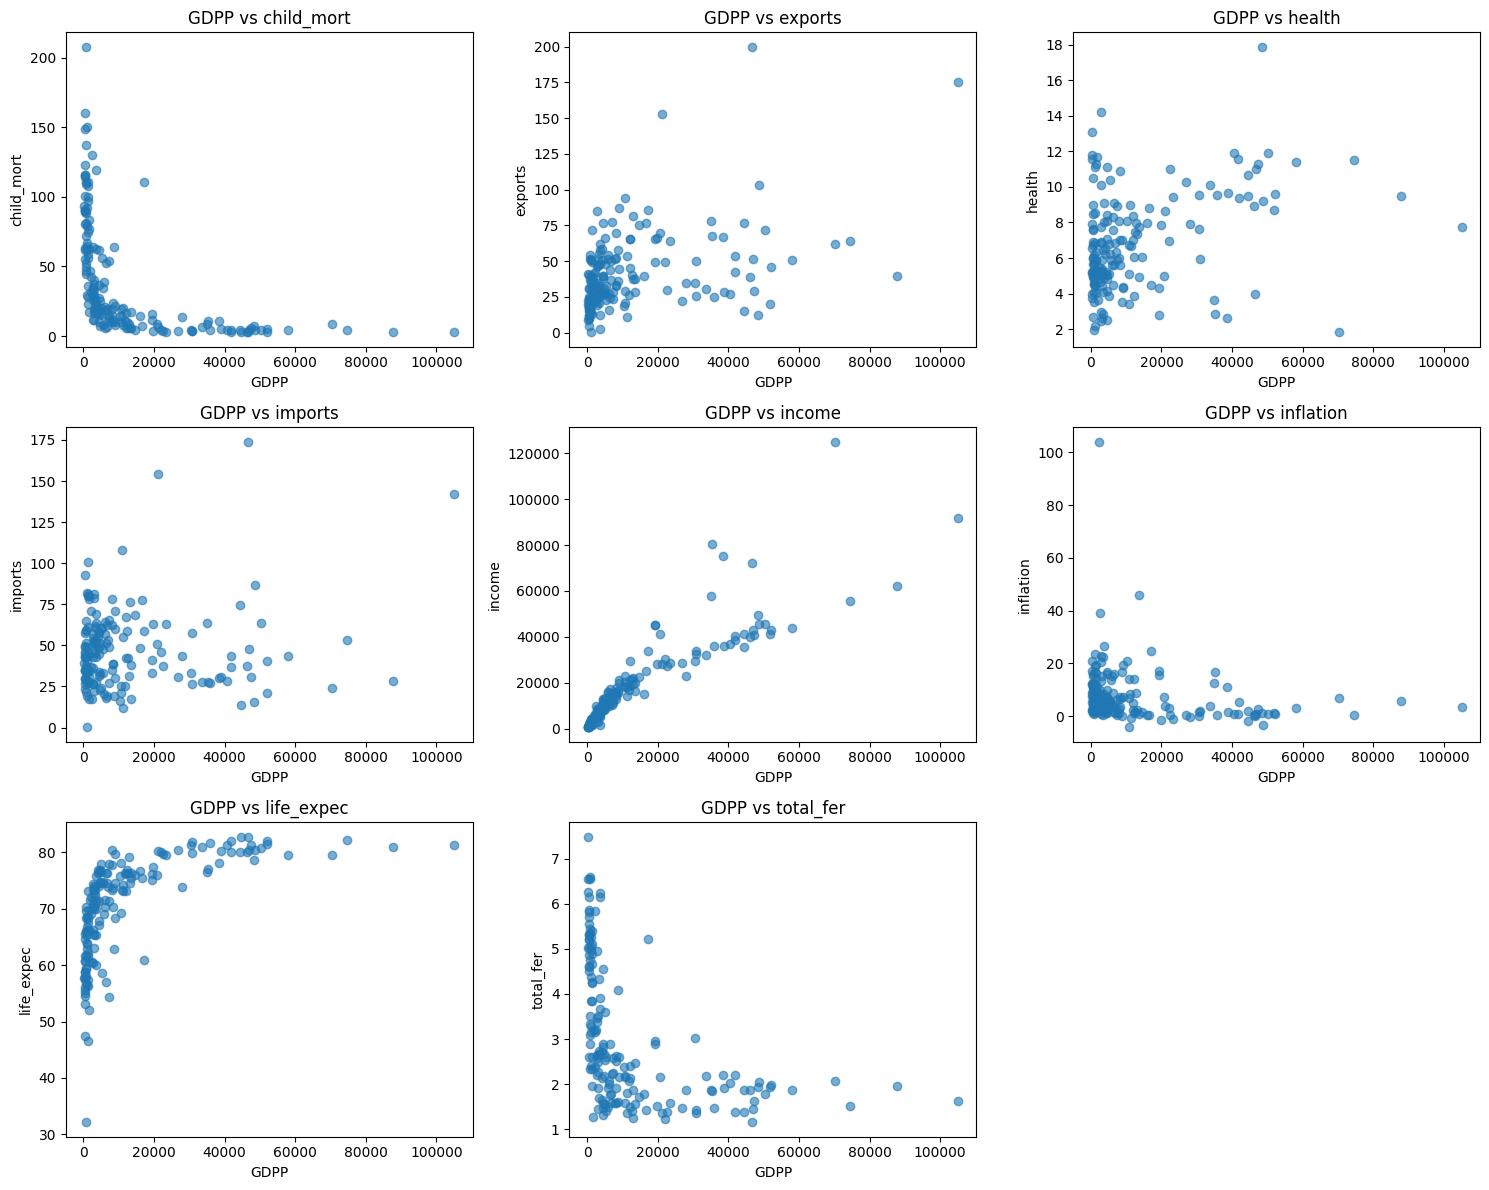

In [19]:
# Plot scatter plots against GDPP
features = df_numeric.columns.tolist()
features.remove('gdpp')

plt.figure(figsize=(15, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    plt.scatter(df_numeric['gdpp'], df_numeric[feature], alpha=0.6)
    plt.xlabel('GDPP')
    plt.ylabel(feature)
    plt.title(f'GDPP vs {feature}')
plt.tight_layout()
plt.show()

In [20]:
# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_numeric)

In [21]:
# Find optimal K using Elbow Method (inertia) and Silhouette Score
inertia = []          # Stores Within-Cluster Sum of Squares (WCSS) for each K
silhouette_scores = [] # Stores Silhouette Scores for each K
k_values = range(2, 11) # Test K values from 2 to 10 (inclusive)

for k in k_values:
    # Fit K-means for current K value
    kmeans = KMeans(n_clusters=k, random_state=42)  # random_state ensures reproducibility
    kmeans.fit(scaled_data)  # scaled_data should be preprocessed (e.g., StandardScaler)
    
    # Store inertia (WCSS) for Elbow Method analysis
    inertia.append(kmeans.inertia_)
    
    # Calculate and store Silhouette Score (higher = better separation)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)

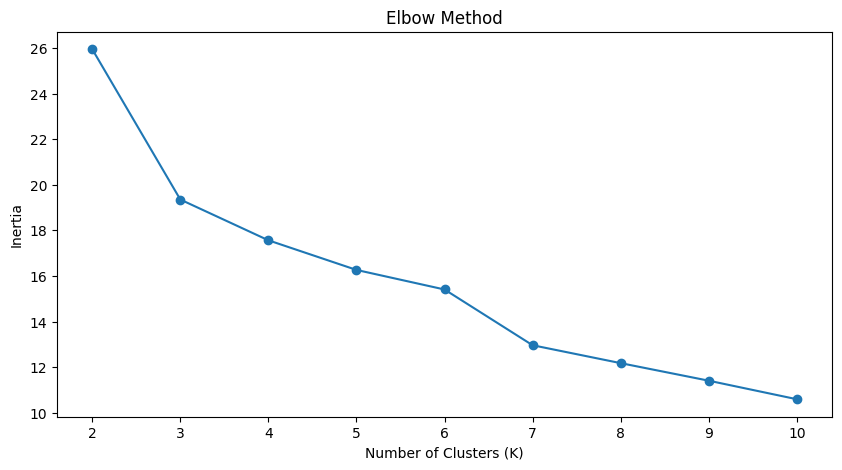

In [22]:
# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

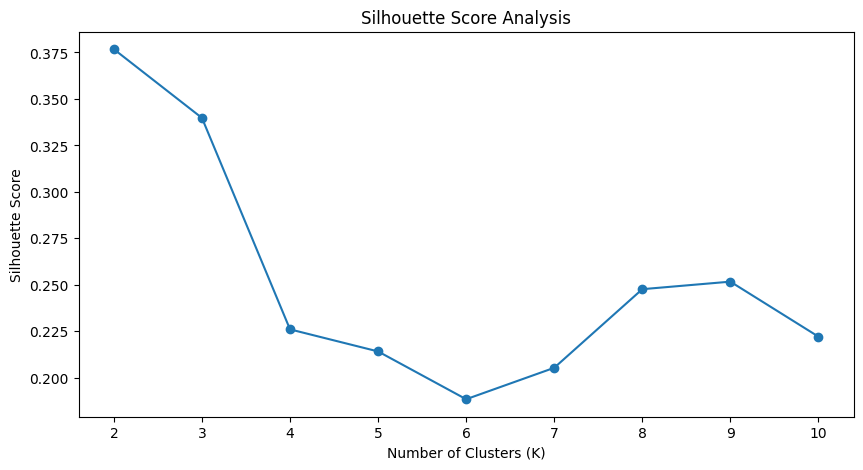

In [23]:
# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')
plt.show()

In [24]:
# Optimal K based on Silhouette Score
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters: {optimal_k}')

Optimal number of clusters: 2


In [25]:

# Fit K-means clustering with the pre-determined optimal K value
# Set random_state=42 for reproducibility
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Assign cluster labels to each data point and store in DataFrame
clusters = kmeans.fit_predict(scaled_data)  # scaled_data should be preprocessed (e.g., StandardScaler)
df['Cluster'] = clusters  # Adds a new 'Cluster' column to the original DataFrame

# Evaluate clustering quality using Silhouette Score (-1 to 1, higher = better separation)
# Note: scaled_data must match the data used for fitting
print(f'Silhouette Score: {silhouette_score(scaled_data, clusters):.4f}')  # Rounded to 4 decimal places


Silhouette Score: 0.3767


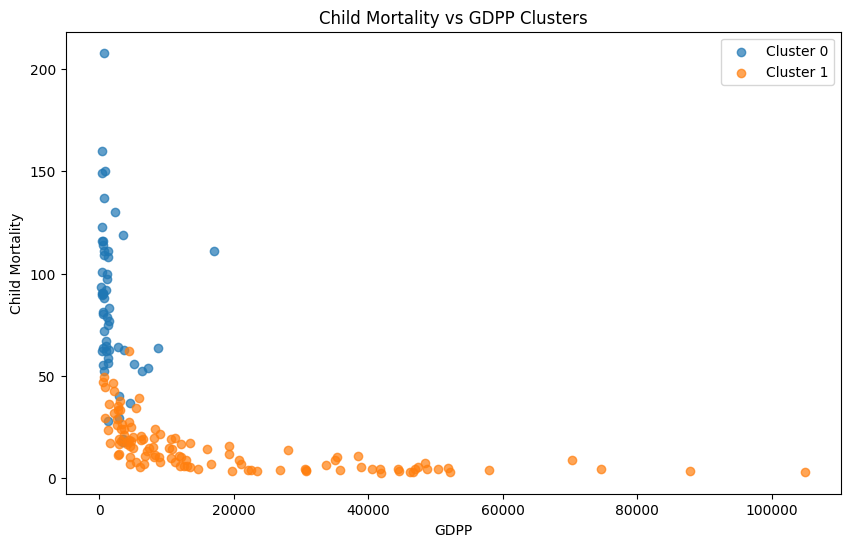

In [26]:
# Visualize clusters for Child Mortality vs GDPP
plt.figure(figsize=(10, 6))
for cluster in df['Cluster'].unique():
    plt.scatter(df[df['Cluster'] == cluster]['gdpp'], 
                df[df['Cluster'] == cluster]['child_mort'], 
                label=f'Cluster {cluster}', alpha=0.7)
plt.xlabel('GDPP')
plt.ylabel('Child Mortality')
plt.title('Child Mortality vs GDPP Clusters')
plt.legend()
plt.show()

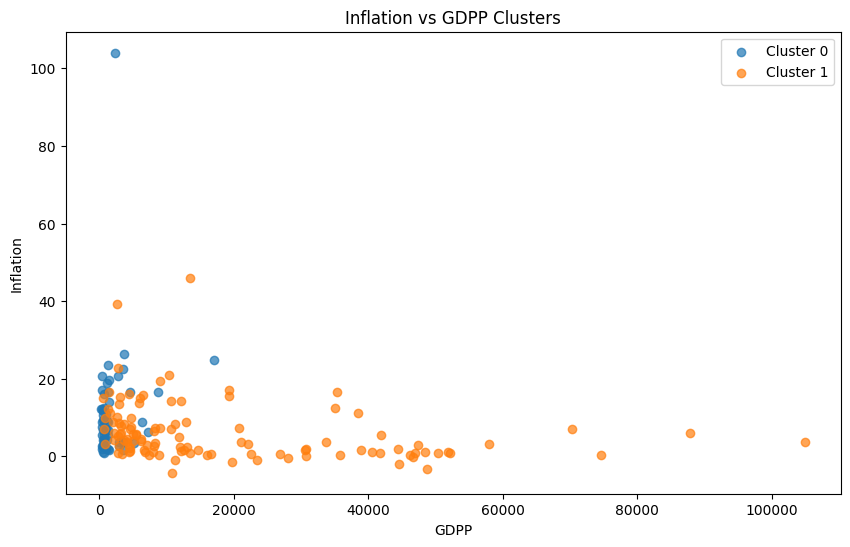

In [27]:
# Visualize clusters for Inflation vs GDPP
plt.figure(figsize=(10, 6))
for cluster in df['Cluster'].unique():
    plt.scatter(df[df['Cluster'] == cluster]['gdpp'], 
                df[df['Cluster'] == cluster]['inflation'], 
                label=f'Cluster {cluster}', alpha=0.7)
plt.xlabel('GDPP')
plt.ylabel('Inflation')
plt.title('Inflation vs GDPP Clusters')
plt.legend()
plt.show()

In [28]:
# Label clusters based on GDPP, child mortality, and inflation

# Calculate mean GDP per capita, child mortality, and inflation for each cluster
# Returns: DataFrame with clusters as index and average metrics as columns
cluster_summary = df.groupby('Cluster')[['gdpp', 'child_mort', 'inflation']].mean()

# Sort clusters by GDP per capita (gdpp) in descending order (highest to lowest)
cluster_summary = cluster_summary.sort_values(by='gdpp', ascending=False)

# Assign labels (e.g., Developed, Developing, Least Developed)
labels = {}
for i, row in cluster_summary.iterrows():
    if row['gdpp'] > 20000 and row['child_mort'] < 20:
        labels[i] = 'Developed'
    elif row['gdpp'] < 10000 and row['child_mort'] > 50:
        labels[i] = 'Least Developed'
    else:
        labels[i] = 'Developing'

print("\nCluster Labels based on GDPP and Child Mortality:")
print(labels)


Cluster Labels based on GDPP and Child Mortality:
{1: 'Developing', 0: 'Least Developed'}
